# Importing the csv file

In [3]:
import pandas as pd

# Load labels from Excel file
Directory = r"C:\Users\pasin\Documents\IIT\FYP\Skin Cancer Detection cnn\2024 Train\skin_cancer.csv"
labels_df = pd.read_csv(Directory)
image_ids = labels_df['image_id'].tolist()
cancer_types = labels_df['dx'].tolist()


# defining the path for the image dataset

In [4]:
# Preprocess the image filenames
image_folder = "C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/"

image_paths = [image_folder + image_id  for image_id in image_ids]


In [5]:
image_paths

['C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024329.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024372.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024418.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024450.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024463.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024468.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024470.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024511.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer/ISIC_0024517.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All cancer

In [6]:
cancer_types

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# Loading the data and preprocessing it, and populating the X and Y arrays

In [7]:
# Load and preprocess the images
import cv2
import numpy as np

In [8]:
# Define the image size
image_size = (200, 200)

# Create empty arrays for X and Y variables
X = []
Y = []

In [9]:
# Iterate over the image paths and cancer types
for image_path, cancer_type in zip(image_paths, cancer_types):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is not None:
        # Resize the image
        image = cv2.resize(image, image_size)
        # Normalize pixel values to the range [0, 1]
        image = image.astype(np.float32) / 255.0
        # Append the preprocessed image to X
        X.append(image)
        # Append the cancer type to Y
        Y.append(cancer_type)
    else:
        # Print an error message or handle the failed image load as needed
        print(f"Failed to load image at {image_path}")

In [10]:
# Convert X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# checking the class distribution in the Y array

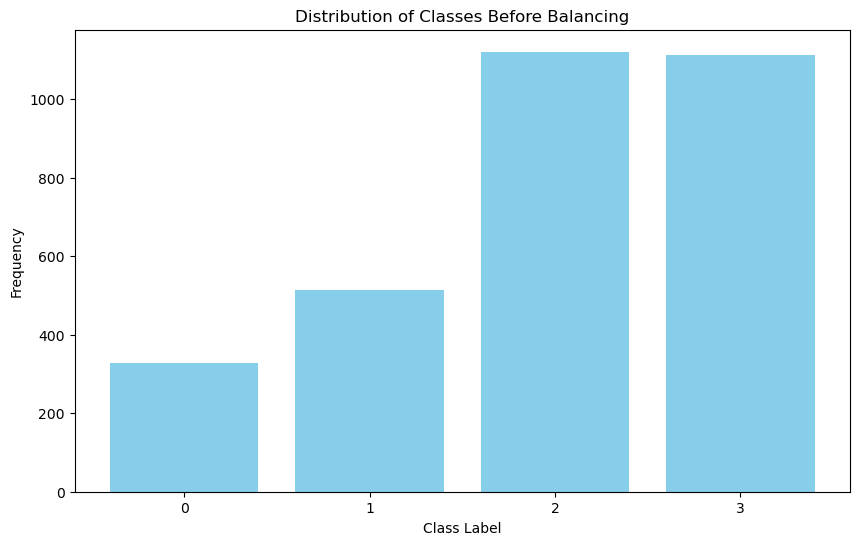

In [11]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(Y, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes Before Balancing')
plt.xticks(unique) 
plt.show()

# Balancing the data

In [12]:
from sklearn.utils import resample

# Set the desired number of samples per class
desired_samples_per_class = 1000

X_balanced = []
Y_balanced = []

# Iterate over each class
for class_label in np.unique(Y):
    # Select samples belonging to the current class
    X_class = X[Y == class_label]
    Y_class = Y[Y == class_label]

    # Check if we need to upsample, downsample, or keep the same number of samples
    if len(X_class) < desired_samples_per_class:
        # Upsample the class
        X_upsampled, Y_upsampled = resample(X_class,
                                             Y_class,
                                             replace=True,
                                             n_samples=desired_samples_per_class,
                                             random_state=123)
    elif len(X_class) > desired_samples_per_class:
        # Downsample the class
        X_downsampled, Y_downsampled = resample(X_class,
                                                 Y_class,
                                                 replace=False,
                                                 n_samples=desired_samples_per_class,
                                                 random_state=123)
        X_upsampled, Y_upsampled = X_downsampled, Y_downsampled
    else:
        # Keep the same number of samples
        X_upsampled, Y_upsampled = X_class, Y_class

    # Append the upsampled class samples to the balanced dataset
    X_balanced.append(X_upsampled)
    Y_balanced.append(Y_upsampled)

# Combine the upsampled samples from all classes
X_balanced = np.vstack(X_balanced)
Y_balanced = np.hstack(Y_balanced)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)

# checking the class distribution in the Y array

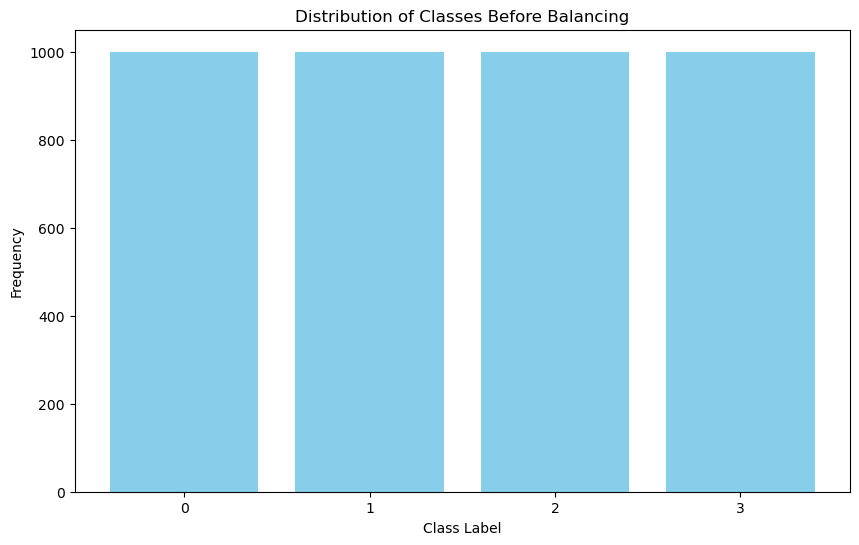

In [14]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(Y_balanced, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes Before Balancing')
plt.xticks(unique)  
plt.show()

# Image augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


augmented_training = augmentation.flow(X_balanced, Y_balanced, batch_size=32)


In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening the output
    layers.Flatten(),
    
    # Dropout for regularization
    layers.Dropout(0.5),
    
    # Dense layer for classification
    layers.Dense(512, activation='relu'),
    
    # Output layer
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\pasin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,796,996 (25.93 MB)

 Trainable params: 6,796,996 (25.93 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# model.fit(augmented_training,
#           epochs=20)  # Adjust based on your specific needs


In [16]:
# # If using an older version of TensorFlow/Keras
# model.fit(X_balanced,Y_balanced,
#                     epochs=20,
#                     validation_data=(X_test, y_test))


In [16]:
model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 715ms/step - accuracy: 0.3967 - loss: 1.2602 - val_accuracy: 0.5050 - val_loss: 1.0960
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 867ms/step - accuracy: 0.5770 - loss: 0.9840 - val_accuracy: 0.5713 - val_loss: 0.9730
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6118 - loss: 0.9168 - val_accuracy: 0.5800 - val_loss: 0.9354
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6235 - loss: 0.8531 - val_accuracy: 0.6288 - val_loss: 0.8428
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.7092 - loss: 0.7335 - val_accuracy: 0.6875 - val_loss: 0.8182
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.7096 - loss: 0.6961 - val_accuracy: 0.7050 - val_loss: 0.7659
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.7798 - loss: 0.6024 - val_accuracy: 0.7038 - val_loss: 0.7566
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7451 - loss: 0.6533 - val_

In [17]:
model.save(r"C:\Users\pasin\Documents\IIT\FYP\Skin Cancer Detection cnn\2024 Train\ModelFSC.keras")

In [18]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step


In [19]:
y_pred_classes = y_pred

In [20]:
y_pred


array([[9.99748051e-01, 1.75471159e-05, 5.85014881e-09, 2.34387015e-04],
       [1.62253298e-06, 1.16103935e-08, 3.02173616e-03, 9.96976614e-01],
       [8.58171523e-01, 8.56591761e-02, 4.94948514e-02, 6.67443965e-03],
       ...,
       [6.13136363e-05, 6.46278477e-06, 9.66773331e-01, 3.31588946e-02],
       [1.72451138e-01, 2.82205433e-01, 3.95155013e-01, 1.50188491e-01],
       [1.07990186e-10, 1.00633918e-10, 9.99995708e-01, 4.26046881e-06]],
      dtype=float32)

In [21]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [22]:
y_pred_classes

array([0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 1, 1,
       3, 1, 2, 0, 3, 3, 3, 1, 3, 1, 3, 2, 2, 0, 0, 1, 3, 3, 1, 1, 3, 0,
       3, 3, 1, 0, 0, 2, 1, 3, 0, 3, 0, 0, 2, 1, 1, 3, 3, 0, 2, 3, 2, 1,
       3, 0, 1, 0, 1, 3, 0, 0, 0, 1, 3, 3, 0, 1, 2, 0, 1, 0, 3, 0, 3, 1,
       2, 3, 1, 2, 0, 0, 1, 1, 1, 3, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 3,
       3, 1, 3, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 3, 3, 2, 3, 3, 0, 1, 2, 1,
       1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 1, 0, 0, 0, 0, 1, 2, 3, 1, 2, 0, 2,
       3, 2, 1, 3, 2, 2, 3, 3, 2, 2, 0, 2, 1, 3, 0, 1, 1, 0, 1, 0, 2, 1,
       3, 0, 3, 2, 2, 1, 1, 1, 3, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 3, 2,
       0, 3, 2, 3, 1, 3, 3, 1, 0, 3, 3, 1, 1, 3, 2, 2, 1, 0, 3, 2, 0, 3,
       3, 1, 2, 2, 1, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 0, 3, 0, 2, 0, 1, 0, 1, 3, 2, 3, 0, 3, 3, 3, 0, 0, 1, 2,
       1, 2, 3, 0, 3, 2, 0, 3, 1, 3, 2, 0, 1, 3, 1, 3, 2, 1, 0, 2, 0, 0,
       1, 3, 0, 1, 3, 0, 0, 2, 1, 3, 0, 2, 1, 0, 1,

In [23]:
y_test

array([0, 3, 0, 3, 2, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 0, 0, 0, 1, 1,
       3, 1, 2, 0, 3, 3, 2, 1, 2, 1, 3, 2, 2, 0, 0, 1, 2, 3, 2, 1, 3, 0,
       3, 3, 1, 0, 0, 3, 1, 3, 0, 1, 0, 0, 2, 1, 3, 3, 3, 0, 2, 3, 2, 1,
       3, 0, 1, 0, 1, 3, 3, 0, 0, 3, 3, 1, 0, 1, 2, 0, 1, 0, 3, 0, 3, 1,
       2, 2, 1, 2, 3, 0, 1, 1, 1, 3, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 3,
       3, 1, 3, 1, 1, 3, 0, 1, 0, 3, 1, 2, 1, 2, 3, 2, 1, 3, 0, 1, 2, 3,
       2, 2, 1, 2, 3, 3, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 3, 1, 2, 0, 2,
       3, 3, 1, 3, 2, 2, 3, 3, 2, 2, 0, 3, 1, 2, 0, 1, 1, 0, 3, 0, 2, 1,
       2, 0, 2, 3, 2, 1, 3, 1, 3, 3, 3, 2, 0, 1, 2, 3, 3, 1, 1, 1, 3, 2,
       0, 0, 2, 3, 1, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 1, 0, 2, 2, 0, 3,
       0, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 2, 0, 0, 1, 1, 0, 1, 1, 3,
       2, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 3, 2, 3, 2, 1, 3, 3, 0, 0, 1, 2,
       1, 2, 3, 3, 3, 2, 0, 3, 1, 2, 2, 0, 1, 3, 1, 2, 2, 1, 0, 2, 1, 0,
       1, 2, 0, 1, 2, 0, 0, 3, 1, 3, 0, 2, 1, 0, 1,

Confusion Matrix:
[[198   5   1   5]
 [  7 192   4  10]
 [  6  14 138  36]
 [  9  13  18 144]]


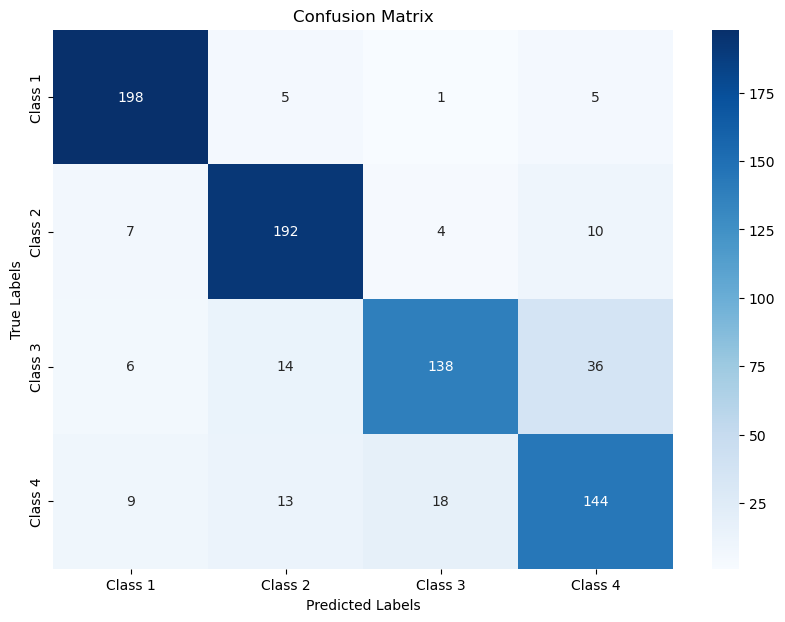

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.90      0.95      0.92       209
     Class 2       0.86      0.90      0.88       213
     Class 3       0.86      0.71      0.78       194
     Class 4       0.74      0.78      0.76       184

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.83       800
weighted avg       0.84      0.84      0.84       800



In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define target names for the 13 classes
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report for 13 Classes
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))


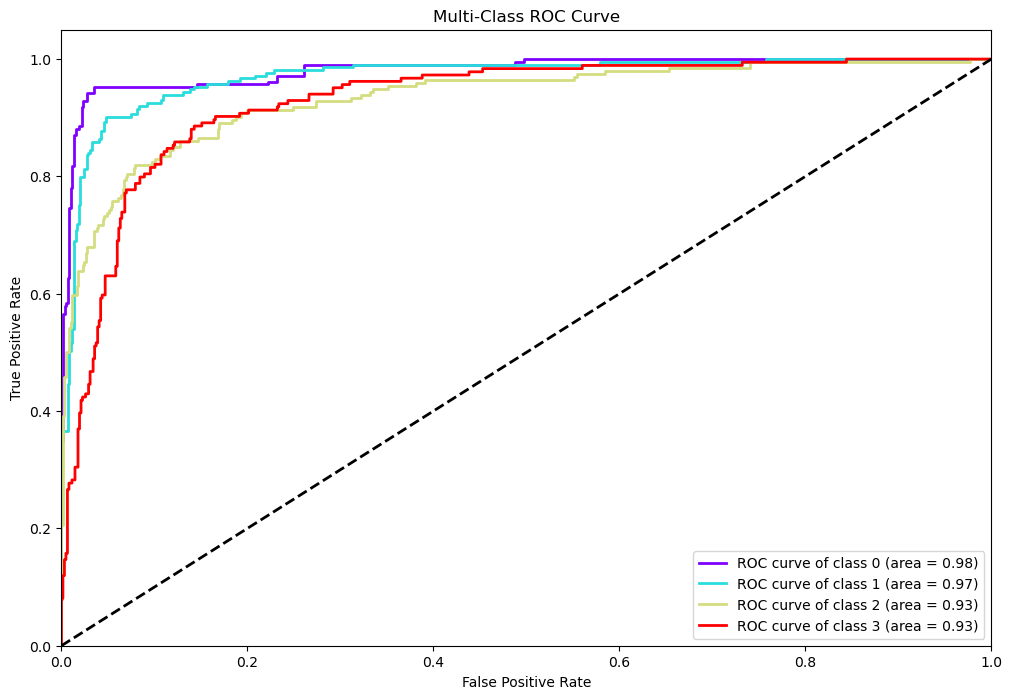

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[*range(4)])
y_pred_binarized = y_pred  

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = iter(plt.cm.rainbow(np.linspace(0, 1, 4)))
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


# testing

In [31]:
import cv2
randomImg = cv2.imread(r"C:\Users\pasin\Documents\IIT\FYP\Skin Cancer Detection cnn\2024 Train\Dermnet\Normal Skin\image4.jpg")

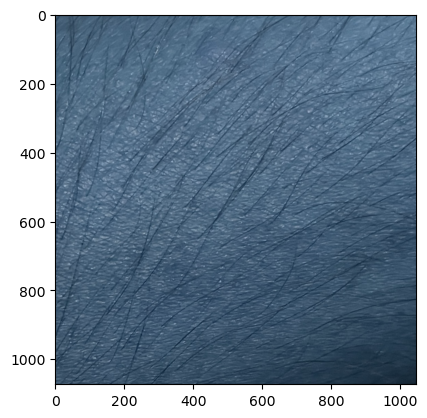

In [32]:

import matplotlib.pyplot as plt
plt.imshow(randomImg)
randomImg.shape

randomImgR = cv2.resize(randomImg, (200,200))
randomImgR = randomImgR.reshape(1,200,200,3)
# before resizing and preprocessing the test image

In [33]:
pred = model.predict(randomImgR)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
test = np.argmax(pred, axis=1)

In [35]:
test

array([7], dtype=int64)

In [36]:
print(test)

[7]
